# 1. Introduction and Business Problem

#### An insurance company is extending the number of their tied agencies. They are looking for an appropriate location for a new agency in Zurich, Switzerland. Following criteria is important: 

1. Proximity to public transportation. People in Switzerland are very environmentally conscious, a majority of them prefer traveling by train or bus, therefore it is very important, that the agency is easy to reach.
2. Proximity to shopping malls or nice coffee/food places. Swiss people don't buy much insurance products online, they still rely a lot on a personal advice and make use of the appointment in an agency extensively. In addition, buying an insurance is a rather boring, tedious topic. People try to solve it on the go, between other activities. So to be successful, the agency shall be located appropriately, close to stores and food places. 

# 2. Data used

I will be using 
1) GeoJSON data for Zurich, published by the City of Zurich for the free use:
https://www.stadt-zuerich.ch/geodaten/download/Statistische_Quartiere

This data provides a granular information about the neighborhoods of the City of Zurich. I will be using it to get the initial selection list of the neighbourhoods (see screenshot below showing the homepage of the City of Zurich).

2) Foursquare location data, provided via Foursquare API. I will leverage this data to explore the venues in the neighbourhoods of Zurich and determine, which neighbourhoods fulfil the criteria listed above. Based on this, I will make a final suggestion for the best location(s).

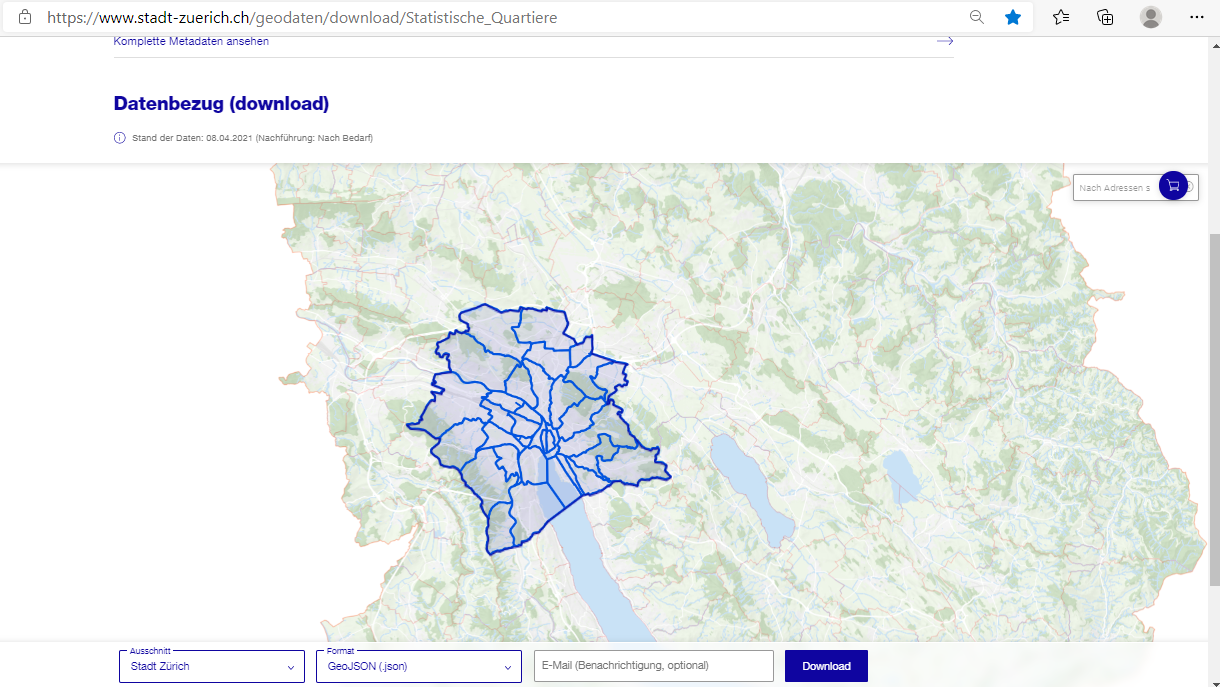

# 3. Exploratory Data Analysis

1. The GeoJSON dataset with the neighborhoods of Zurich was provided by the City Administration in the standardized form that didn't require any cleanup. 
After reading the file I extracted the relevant information - neighborhood name, latitude and longitude into a pandas dataframe for further investigation. 

2. The dataset revealed 22 Zurich neighborhoods as potential candidates for an insurance location. These were viualized using the Folium map rendering library.

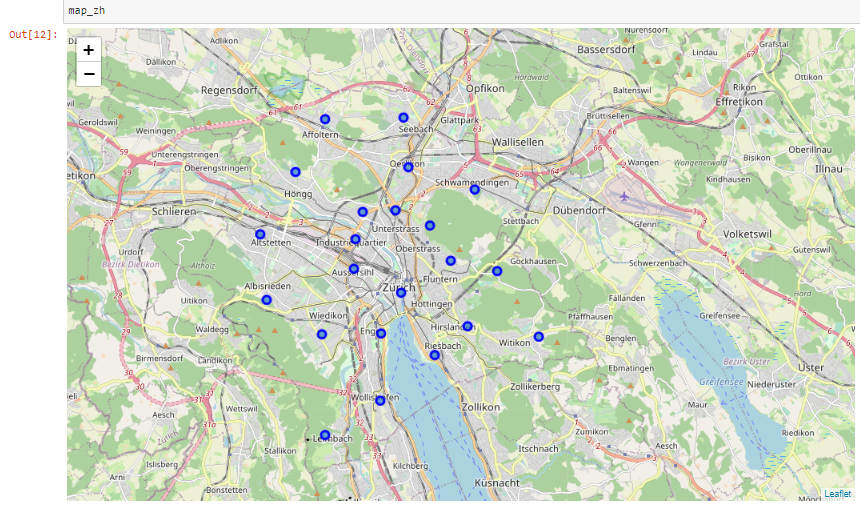

3. In order to explore the 22 neighborhoods with regard to the relevant criteria - availability of public transportation, proximity to shopping centers and food places - I used the Foursquare library that provides venue information fo the places of interest. To do so, I initialized and used my Foursquare developer credentials.

4. The Foursquare request, restricted to max. 100 records per neighborhood and 500m radius, returned altogether 516 records.

5. I checked which Zurich neighborhoods have the highest number of venues just to see which have a larger density and thus choice. These are Top five:
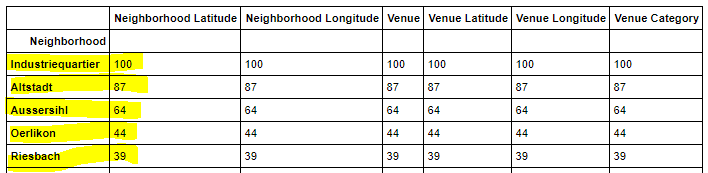

6. Then I looked at the returned categories to pick the ones of interest, according to the Business Problem: public transportation, food places, stores. First, I considered the public transportation, that is categories 'Train station', 'Tram station', 'Bus station'. I grouped these records into a new venue group 'Public transportation'. 
The same I did for a group 'Food places' by selecting records containing the words 'Restaurant' and 'Cafe' and for a group 'Stores' by selecting records with 'Shop', 'Store', 'Supermarket'.
The result of the selection is as follows:
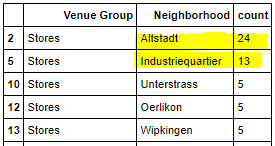 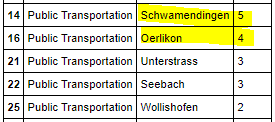 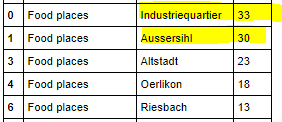

7. There was no clear "winner". I therefore weighted the results by giving each category a score according to the importance. Public transportation was weighted with 3, supermarkets received 2 and food places remained with 1. 
The total score per neighborhood looks as follows:
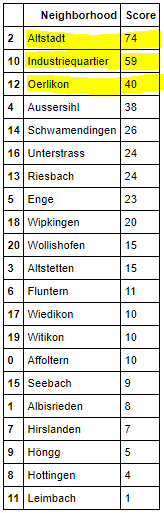

8. For this particular problem no clustering or the like was required and therefore no machine learning algorithm was applied.

# 4. Results: Altstadt and Industriequartier

The result is that Altstadt (= in German "Old city") collected the highest score (74) with regard to the relevant criteria for an insurance agency. However, the rent prices in Old City might be very high. Depending on the available budget, we might also be taking into consideration the number Two - Industriequartier (=In German "Industrial area") with the score 59:
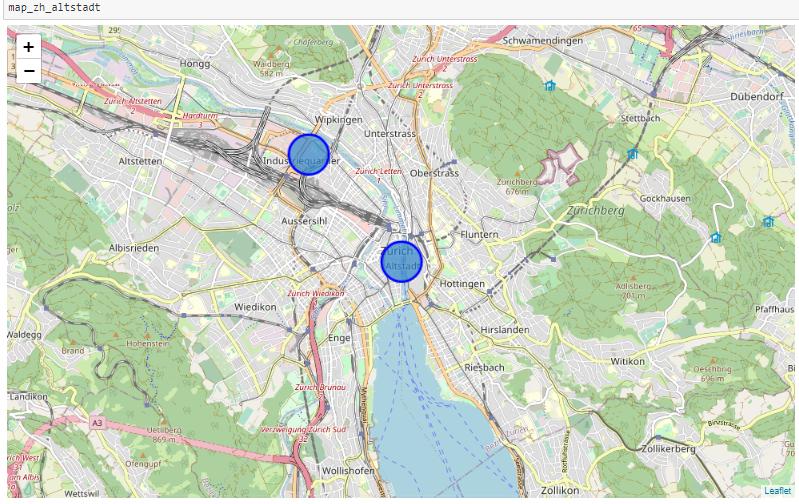

I also visualized results with the relevant venues, using following color code: Red = Public Transportation, Green = Stores, Orange = Food places.
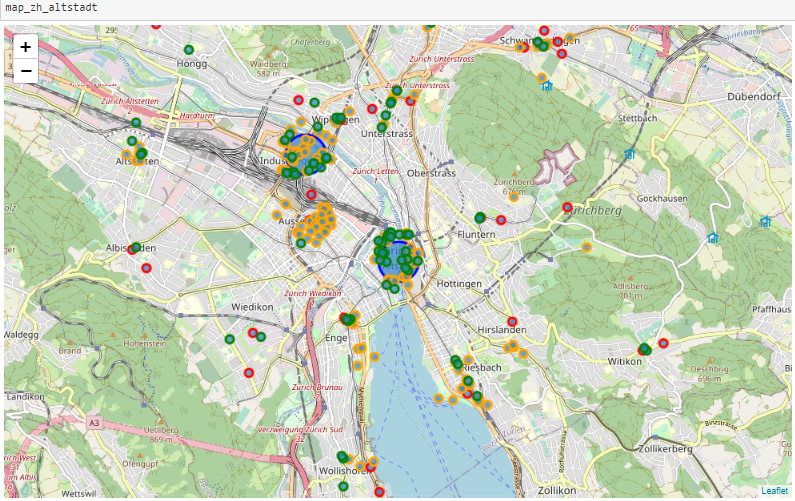

# 5. Conclusion

In this project, I analyzed Zurich neigborhoods in search for an optimal location for an insurance agency, with regard to proximity of public transportation and availability of nearby stores and food places. The most important criteria was public transportation. According to Foursquare, the neighborhood "Schwamedingen" has the largest number of means of transportation. But unfortenately, this neighborhood has only few stores and food places and does not satisfy all of the criteria. Then I looked at shopping venues - stores, supermarkets, shops in Zurich. No surprise that "Altstadt" (= The Old City) has the most of them. So it would be very convenient for the agency clients to get other things done before or after an insurance appointment. And when it comes to places to eat for them, "Industriequartier" offers the widest variety of all kinds of restaurants and cafes. In order to determine a clear choice I scored every neighborhood with the following outcome:

### The solution is to first consider Altstadt as an optimal insurance agency location. If rent prices are too high switch to Industriequartier.

# 6. Observations and recommendations

During the analysis I realized that Foursquare library has little information about the public transportation in Zurich. Only few large train, tram and bus stations of Zurich are registered in Foursquare. I live near Zurich and I know that the Old City, for example, has a very tight transport network. However this isn't visible in the Foursquare response. The same applies to some other neighborhoods I know very well.

I order to deepen the analysis it might be of advantage to look for and use an additional data source specifying the density of public transportation.